# INDIVIDUAL WORK: Introduction to Data Analysis with Python Pandas

Objective: In this assignment, you will familiarize yourself with Python Pandas, a powerful library for data manipulation and analysis. You will use the Titanic dataset to perform exploratory data analysis (EDA) and create a visualization using Matplotlib pyplot.

### Instructions:

1. **Dataset Acquisition:**

- Obtain the Titanic dataset. You can download it from reputable sources such as Kaggle (https://www.kaggle.com/c/titanic/data) or use datasets available directly through Python libraries.

2. **Exploratory Data Analysis (EDA):**

- Load the Titanic dataset into a Pandas DataFrame.

- Use Pandas methods to explore and understand the dataset:

. Display the first few rows to get an overview of the data structure.

. Check the dimensions of the dataset (number of rows and columns).

. Identify missing values and decide on strategies for handling them.

. Compute basic statistics (e.g., mean, median, min, max) for numerical columns.

. Analyze categorical variables (e.g., value counts).

3. **Data Visualization:**

- Choose one column of the dataset that interests you
- Use Matplotlib pyplot to create a meaningful visualization:

. Select an appropriate plot type (e.g., bar chart, histogram, pie chart).

. Label axes, add a title.

. Ensure the visualization is clear, informative, and visually appealing.

4. **Submission:**

- You can include code snippets, comments explaining your thought process
- Submit your completed assignment

### Resources:

Pandas Documentation: https://pandas.pydata.org/docs/

Matplotlib Documentation: https://matplotlib.org/stable/contents.html

In [73]:
import pandas as pd
import seaborn as sns

titanic_df=sns.load_dataset('titanic')
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [74]:
rows, columns = titanic_df.shape
print(f'numbers of rows: {rows}\nnumber of columns: {columns}')

numbers of rows: 891
number of columns: 15


In [75]:
missing_values = titanic_df.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [76]:
cleaned_titanic_df = titanic_df.dropna(subset=['embarked', 'embark_town'])
rows, columns = cleaned_titanic_df.shape
print(f'numbers of rows: {rows}\nnumber of columns: {columns}')

numbers of rows: 889
number of columns: 15


In [140]:
number_passengers = len(titanic_df['survived'])
number_survivors = titanic_df['survived'].sum()

survivors_df = titanic_df[titanic_df['survived'] == 1]
youngest_survivor = survivors_df['age'].min()
oldest_survivor_age = survivors_df['age'].max()

oldest_survivor_age_index = survivors_df['age'].idxmax()
oldest_survivor_gender = survivors_df.loc[oldest_survivor_age_index, 'who']

print(f'{number_survivors} people survived out of {number_passengers} passengers')
print(f'the youngest survivor was {youngest_survivor} years old child')
print(f'the oldest survivor was {oldest_survivor_age} years old {oldest_survivor_gender}')

342 people survived out of 891 passengers
the youngest survivor was 0.42 years old child
the oldest survivor was 80.0 years old man


In [86]:
survivors_df = titanic_df[titanic_df['survived'] == 1]
titanic_survivors_gender = survivors_df['who'].value_counts().reset_index()
titanic_survivors_gender

,who,count
0,woman,205
1,man,88
2,child,49


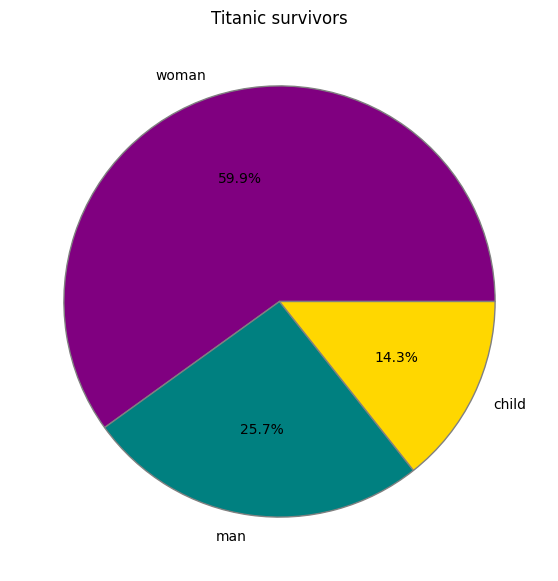

In [139]:
import matplotlib.pyplot as plt

titanic_survivors_gender = survivors_df['who'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    titanic_survivors_gender,
    labels = titanic_survivors_gender.index,
    autopct='%1.1f%%',
    colors=['purple', 'teal', 'gold'] ,
    wedgeprops={'edgecolor': 'grey'})
plt.title('Titanic survivors')
plt.show()